<a href="https://colab.research.google.com/github/alagarde-bit/Data-Mining-and-Machine-Learning/blob/main/lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 06 Text Mining TFIDF
## CSC 401 Lab
## Alex Lagarde
### 3/1/21

### 3. What are your impressions of data mining and machine learning (the concepts, not the course)?

I think it is about finding patterns to help make accurate predictions when given new data to make decisions more efficient.

### 4. Writing Code

In [ ]:
# a. importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import NearestNeighbors

In [ ]:
# b. reading csv link into pandas dataframe 
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1u_8wAeimcuUtZSgcDhvhd0SK8KE5fHS5')
df.head(5)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
0,"buzzwordy, but needed. I'm excited to learn deeper methods of data mining and machine learning. Usually when I see machine learning, I assume that people are just applying models, so I'm curious about what we'll learn.","CSC 111 Data Science and Visualization, CSC 230 Computer Science II, CSC 301 Database Systems",6.0,7.0,7.0,7.0,4.0,4.0,7.0,5.0,7.0,6.0,1.0,1.0,1.0,3.0,5.0
1,I don’t know much about them,"CSC 230 Computer Science II, CSC 301 Database Systems, CSC 335 Programming Languages, CSC 340 Mobile App Development",6.0,4.0,4.0,6.0,2.0,4.0,5.0,5.0,6.0,6.0,3.0,3.0,2.0,2.0,6.0
2,"These two concepts seem intimately intertwined. The DM part of the course seems to be centered around web crawling? And the ML part is more math based with less coding and more ""tying togetherness."" Very excited for the course.","CSC 111 Data Science and Visualization, CSC 230 Computer Science II, CSC 301 Database Systems, CSC 320 Web Development",6.0,7.0,5.0,6.0,6.0,6.0,5.0,7.0,7.0,7.0,4.0,6.0,2.0,7.0,4.0
3,"To me, data mining is being able to harvest data of interest to inform and make decisions. And machine learning is teaching machines tasks to increase efficiency and accuracy.","CSC 230 Computer Science II, CSC 242 Organization and Architecture, CSC 301 Database Systems, CSC 320 Web Development, CSC 331 Algorithm Analysis, CSC 335 Programming Languages, CSC 340 Mobile App Development",7.0,7.0,6.0,6.0,3.0,7.0,7.0,2.0,7.0,6.0,7.0,3.0,1.0,2.0,4.0
4,I believe data mining is looking through code and data to try to find answers to potential questions. Machine learning is programing a machine to be able to learn and improve on its own to become more efficient.,"CSC 230 Computer Science II, CSC 242 Organization and Architecture, CSC 301 Database Systems, CSC 320 Web Development, CSC 321 Robotics, CSC 331 Algorithm Analysis, CSC 335 Programming Languages, CSC 340 Mobile App Development",7.0,6.0,5.0,7.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0


In [ ]:
# c. display the last few rows and remove bad rows
print(df.tail(5))
df.dropna(inplace=True)
print(df.tail(5))

   Impressions  ... Confidence_conditional_probability
29         NaN  ...                                NaN
30         NaN  ...                                NaN
31         NaN  ...                                NaN
32         NaN  ...                                NaN
33         NaN  ...                                NaN

[5 rows x 17 columns]
                                                                                                                                                                                                      Impressions  ... Confidence_conditional_probability
19                                 Having taken "data mining" in the business school, I believe the topic is mostly how to manipulate data to fit an algorithm/model that helps to solve or understand a problem.  ...                                2.0
20  I've had a bit of exposure to machine learning (business uses) in some prior internships, but not much hands-on. I'm assuming big data will be 

In [ ]:
# d. Pulling out impressions column into variable impressions and displaying first few rows
pd.set_option('display.max_colwidth', None)
impressions = df['Impressions']
impressions.head(5)

0             buzzwordy, but needed. I'm excited to learn deeper methods of data mining and machine learning. Usually when I see machine learning, I assume that people are just applying models, so I'm curious about what we'll learn.
1                                                                                                                                                                                                           I don’t know much about them
2    These two concepts seem intimately intertwined. The DM part of the course seems to be centered around web crawling? And the ML part is more math based with less coding and more "tying togetherness." Very excited for the course.
3                                                        To me, data mining is being able to harvest data of interest to inform and make decisions. And machine learning is teaching machines tasks to increase efficiency and accuracy.
4                    I believe data mining is looking through code a

In [ ]:
# e. Making a list of unhelpful words named stop_words
stop_words = ['I', 'it', 'so', 'what', 'in', 'and', 'the', 'is', 'of', 'on', 'its','am', "I'm", "we'll", 'have', 'an', 'be', 've']
# f. Extract terms and Count Occurences
count_vec = CountVectorizer(lowercase=True, stop_words=stop_words)
sparse = count_vec.fit_transform(impressions)
# g. Print out the first 10 features (terms) and the counts for the first 5 examples
terms = count_vec.get_feature_names()
counts = sparse.todense()
for x in np.arange(0,10):
  print('Feature:', terms[x], '\n Counts: \n', counts[:5, x])

Feature: ability 
 Counts: 
 [[0]
 [0]
 [0]
 [0]
 [0]]
Feature: able 
 Counts: 
 [[0]
 [0]
 [0]
 [1]
 [1]]
Feature: about 
 Counts: 
 [[1]
 [1]
 [0]
 [0]
 [0]]
Feature: accuracy 
 Counts: 
 [[0]
 [0]
 [0]
 [1]
 [0]]
Feature: aid 
 Counts: 
 [[0]
 [0]
 [0]
 [0]
 [0]]
Feature: algorithm 
 Counts: 
 [[0]
 [0]
 [0]
 [0]
 [0]]
Feature: amazon 
 Counts: 
 [[0]
 [0]
 [0]
 [0]
 [0]]
Feature: analysis 
 Counts: 
 [[0]
 [0]
 [0]
 [0]
 [0]]
Feature: analytics 
 Counts: 
 [[0]
 [0]
 [0]
 [0]
 [0]]
Feature: analyze 
 Counts: 
 [[0]
 [0]
 [0]
 [0]
 [0]]


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 'we'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
# h. Creating a matrix of TF-IDF scores
tfidf_t = TfidfTransformer()
sparse_tfidf = tfidf_t.fit_transform(counts)
tfidf = sparse_tfidf.todense()
tfidf


matrix([[0.        , 0.        , 0.14555774, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.35205268, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.13341156, 0.        ,
         0.        ],
        ...,
        [0.35632878, 0.        , 0.        , ..., 0.52744719, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

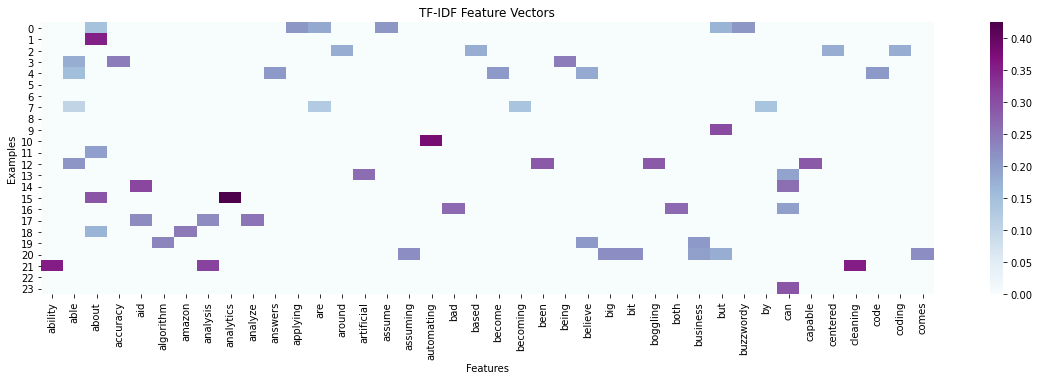

In [ ]:
# i. Displaying heatmap all rows but just 40 columns
plt.figure(figsize=(20, 5))
sns.heatmap(tfidf[:, :40], square=False, annot=False, cbar=True, cmap="BuPu",
            xticklabels=terms[:40])

plt.xticks(rotation=90) 
plt.xlabel('Features')
plt.ylabel('Examples')
plt.title('TF-IDF Feature Vectors')
plt.show()

In [ ]:
# j. Using the text you wrote in above as a new example. Find the 5 most similar impressions from the data.
alex = ['I think it is about finding patterns to help make accurate predictions when given new data to make decisions more efficient.']
alex_counts = count_vec.transform(alex)
alex_tfidf = tfidf_t.transform(alex_counts)
alex_tfidf = alex_tfidf.todense()
knn = NearestNeighbors(n_neighbors=5, algorithm='brute', metric=distance.cosine)
model = knn.fit(tfidf)

In [ ]:
# k.  Print out text and cosine distance
distance, neighbor_idx = model.kneighbors(alex_tfidf)
print('5 Most Similar Impressions:')
for i in np.arange(0,5):
  print(i+1,'Impression:', impressions.iloc[i], '\n Cosine Distance:', distance[0][i], '\n')


5 Most Similar Impressions:
1 Impression: buzzwordy, but needed. I'm excited to learn deeper methods of data mining and machine learning. Usually when I see machine learning, I assume that people are just applying models, so I'm curious about what we'll learn. 
 Cosine Distance: 0.6794957223373953 

2 Impression: I don’t know much about them 
 Cosine Distance: 0.7382307989782708 

3 Impression: These two concepts seem intimately intertwined. The DM part of the course seems to be centered around web crawling? And the ML part is more math based with less coding and more "tying togetherness." Very excited for the course. 
 Cosine Distance: 0.7763195333194398 

4 Impression: To me, data mining is being able to harvest data of interest to inform and make decisions. And machine learning is teaching machines tasks to increase efficiency and accuracy. 
 Cosine Distance: 0.8183665154343642 

5 Impression: I believe data mining is looking through code and data to try to find answers to potential